### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-10/single"

MODE = "single"
dev = False

### From here; automatic run

In [4]:
if not root.endswith("/"):
    root += "/"

In [5]:
sep_category = "$" # separates categories like date, experiments, etc
sep_count = "%" # separated the number of hairs by experiment

In [6]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$single.txt


In [7]:
savepath = f"{root}plots/"
if dev:
    savepath = f"{root}plots/dev/"
    import plotting_dev as plotting
os.makedirs(savepath, exist_ok=True)

In [8]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=10)

        # clean the df
        if MODE in file:
            df = plotting.clean_single(df)
        else:
            raise ValueError(f"Not a {MODE} experiment")

        splitted_name = file.split(sep_category)
        # get the experiments; i.e. not the date
        # not the single or triple etc
        splitted_name = splitted_name[2:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split(sep_count)
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241210$IHNY$25%phosctrl$25% kp 0.01$25%kp 0.03$25% kp 0.05$single.txt


,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
1,2.0,4485.8,30.2,0.868,5.840000e+09,0.000000e+00,0.01070,0.232,22.5,0.861,59.7,0.000035,46.788,1.030,230.0,phosctrl
2,3.0,2338.4,30.2,0.404,5.230000e+09,0.000000e+00,0.00578,0.232,23.1,0.827,54.1,0.000016,52.050,0.501,214.0,phosctrl
3,4.0,4630.4,30.2,0.748,4.880000e+09,0.000000e+00,0.01160,0.265,18.1,0.828,45.3,0.000025,54.588,0.929,201.0,phosctrl
4,5.0,4774.1,30.1,0.922,5.810000e+09,5.050000e-07,0.00789,0.233,14.8,0.865,51.1,0.000030,36.748,0.931,195.0,phosctrl
5,6.0,2425.2,30.5,0.434,5.470000e+09,-1.470000e-08,0.00448,0.262,23.3,0.819,53.6,0.000016,44.364,0.411,170.0,phosctrl


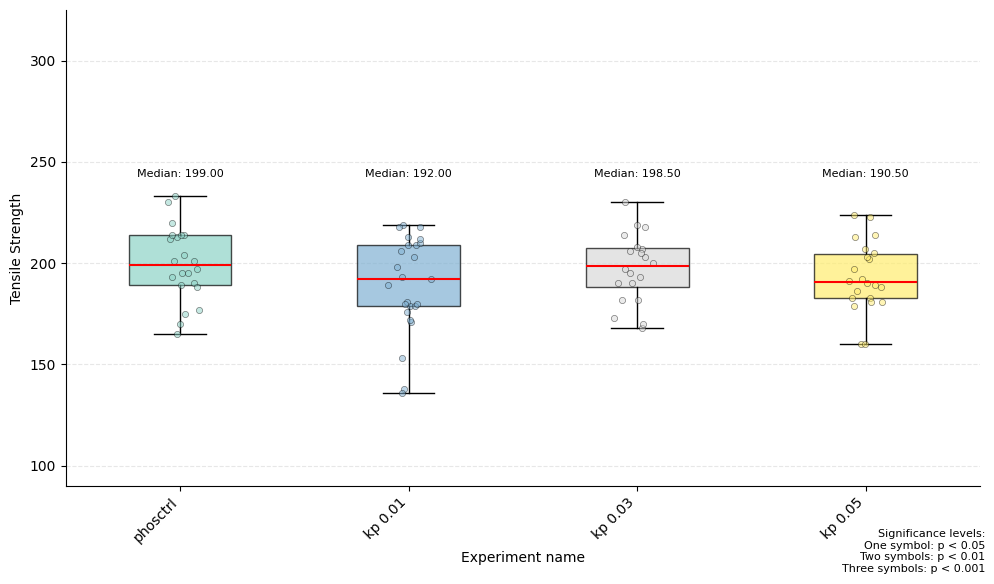

In [9]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [10]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")

Median TENSILE_STRENGTH for phosctrl: 199.0
Median TENSILE_STRENGTH for  kp 0.01: 192.0
Median TENSILE_STRENGTH for kp 0.03: 196.0
Median TENSILE_STRENGTH for  kp 0.05: 190.5


In [11]:
len(df_merged)

93

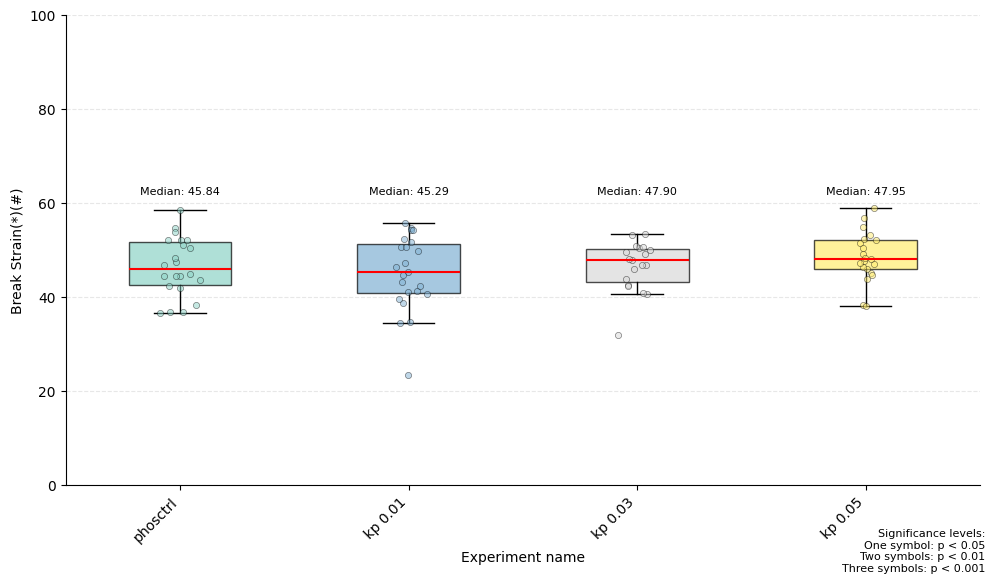

In [12]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between phosctrl and  kp 0.05: p = 0.0338


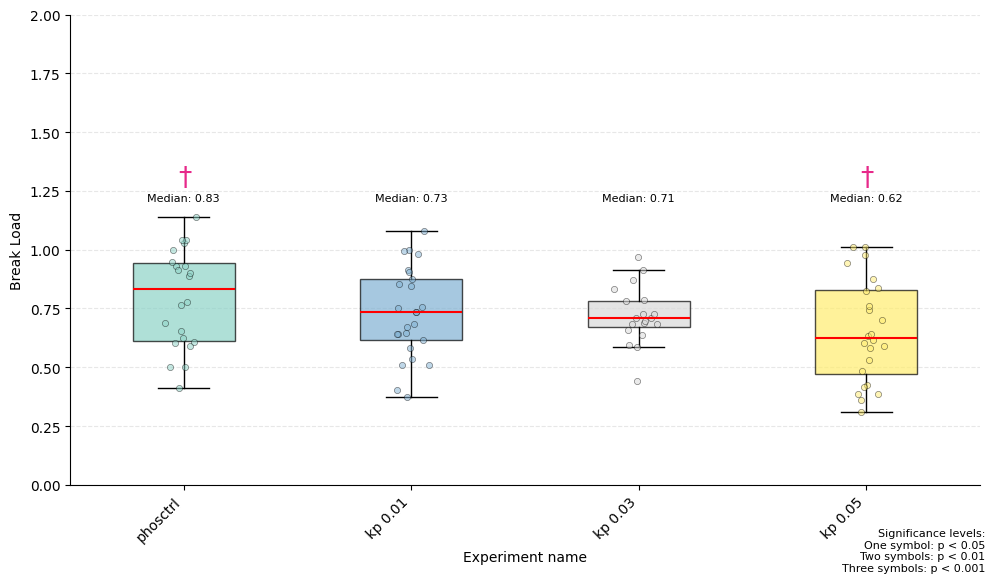

In [13]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()